## TO-DO
 - Write a report on my methods so far and what I've found (scientific style with sources)
     - seperate from this work

#### Guide to using this website:

So this website is basically a slideshow. It will work on your phone, iPad or computer.

Navigate using the arrows in the bottom right, by using your arrow keys, or by swiping your finger.

To the right, there are new sections, I will cover the sections on the slide below this.

As you move down, you continue on in the same section. If you press escape, you will be able to see am overview of all of the slides.

On the slide below, the presentation will begin. Navigate down when you're ready.


 - Kaggle Notebook: https://www.kaggle.com/a100186/aup-990

 - Github Repo: https://github.com/beachc15/Benford_Analysis_AUP990

# Benford Analysis

### Charles Beach

### IBA 4020 - Computational Finance

# Introduction and Glossary

## Slideshow
This interactive slideshow will walk through the code I have created to conduct a Benford Analysis on AUP's 990 tax form. The goal of writing this code is to create a system where anybody can input a csv file into this code (found on Kaggle or github) and the code will automatically do a full Benford analysis. The only work that the user needs to do is connect the file. 

At this point the code is not idiot-proofed yet so it needs to be set up to deal with some dope who tries to put in a spreadsheet full of words or whatever. That idiot-proofing will be done, but that much code is too much for this slideshow. 

## Benford Analysis
   Benford's Law is based around the idea that numbers aren't evenly distributed in nature. They are distributed abnormally. When examining the first digit of every number from a set, a distinct distribution emerges that appears in all sorts of data sets (see link below). A Benford Analysis leverages this information by comparing numbers on SEC filings, population sizes, street names to the expected value those numbers should be based on Benford's Law and looks for discrepancies between the two.
    
   Often discrepancies could mean fraud is involved. For example, Enron's financial statements do not follow Benford's Law while the line count of the *Rails* 3.0.9 source code does (https://testingbenfordslaw.com/rails-core-line-count). 
    
   On this project we will use the American University of Paris's 2017 990 tax returns as our reference material. Our goal is to use python to examine these tax returns and to determine if they follow Benford's law, and if they do not, what numbers could possibly be fraudulent because of this. At the end we will examine what accounts contain numbers in positions that are not distributed as they should be, then make a recommendation based off of this information as to what accounts should be audited in search of fraud.

### Glossary
* Importing and cleaning the Data
* Basic Data Analysis
* Last-Two Digit Test
* Final Data Analysis
* Locating the Suspicious Data
* Conclusion

**Now you can Navigate to the right to begin**

**Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Import and Data Cleaning

The first thing we will do is import our CSV. It is formatted with account names on the Y axis and headers on the X.

The goal of this program is to be usable for a large number of different CSV's so we can replace this file with another and it will produce meaningful results.

In [2]:
df = pd.read_csv("https://ac.aup.edu/~a100186/Source/Raw_Benford_Numbers.csv", index_col = 'Unnamed: 0')

## Data Cleaning

We need to read and clean our data to put it in a state that is easy for our computer to handle. 

* First we are going to go to each column and add each value to a list, even blank values, which show up as 'NaN'
* Then we create a list called cleanedList which removes all values names 'nan'
* Assign the values to a list finalData

The Next slide is how the data currently looks.

We need to convert that into a list of just numbers, which is easy to evaluate

In [3]:
#an example of some of our data
df.tail()

,A,B,C,D
Land,12041723,NaN,12041723.0,NaN
Buildings,37801365,5866347.0,31935018.0,NaN
Equipment,3045439,1702163.0,1343276.0,NaN
Other,3626520,2836227.0,790293.0,NaN
Capital lease obligations,11201579,NaN,NaN,NaN


### Now we will clean the data

In [4]:
## Remove all "nan" values for blank cells
all = []
for x in df:
    all.append(df[x].values)

cData = []
for i in range(0,3):
    cleanedList = [x for x in all[i] if str(x) != 'nan']
    cData.append(cleanedList)
finalData = []
for z in range(len(cData)):
    for y in cData[z]:
        finalData.append(y)
#finalData is the cleaned data without nan values, we still have to clear the trailing decimal points and zeroes


**We need to clean the trailing 0 and decimal place.**

In [5]:
#this for and if loop evaluates if the value ends with '.0' and if it does, the last two digits are removed
for val in range(len(finalData)):
    if str(finalData[val])[-2:] == '.0':
        finalData[val] = str(finalData[val])[:-2]

## The Data is now cleaned and ready for analysis. 

#### Below is how the data looks now.

You may have noticed some of the data has quotation marks around them. That is because they are strings. In other words your computer views the string as a word, instead of a number that can be used in math functions. This wont matter in the future as we are going to convert everything to type string later.

In [45]:
print(finalData)

['3834833', '36926019', '735579', '396641', '78400', '23543', '259816', '205983', '58833', '24822', '587914', '22336', '101153', '5514388', '2104545', '11303061', '455081', '335673', '6650616', '265798', '118048', '1552635', '336687', '1586477', '556715', '3690707', '560113', '754573', '1450405', '183486', '350531', '623581', '122722', '130526', '258036', '42737986', '38904404', '3833581', '14893635', '131765', '18595451', '12041723', '37801365', '3045439', '3626520', '11201579', '988439', '9774868', '265181', '5281646', '25027', '277114', '275934', '472770', '355273', '235485', '372252', '596599', '84219', '456298', '122564', '236144', '5866347', '1702163', '2836227', '1116106', '862767', '53120', '1071886', '240341', '1123160', '2817', '1070534', '195275', '3433336', '93309', '103211', '99267', '151743', '7697', '19877', '12041723', '31935018', '1343276', '790293']


# Analysis

***Number Selection***

We have all of our Data in one long list with every number. Now is a good time to discuss what numbers were chosen from the 990 and what numbers were ignored...

I intentionally only chose significant, unique numbers that were not entirely dependent on other numbers already included in the data set. I tried to use as few 'totals' and 'subtotals' that were calculated off the sheet as I could.

What this means is that almost every number included here was directly input into the 990 with little supporting documentation available to me. For an example: The account titled, "Contributions, gifts and grants" is a 'totaled' account... but we cannot view the documents and receipts that comprise this total. Therefore there is an opportunity for mistakes or fraud in the number reported.

***Analysis Section***

This is a long one so bear with me. In this section we define functions to parse through our data list and break out the first, second and third digit so we may examine and count them. Then we call the functions and graph the results. 

Excuse the prehistoric looking graphs at this point... I am working on creating them using a different engine, but you get what you get.

When we have our core data, we do some data manipulation to examine the standard deviations and skew of our results against their expected values, which yields some quite interesting results. 

Lastly we create data structures which contain our list of results along with their corresponding expected values, and the difference between them. We do this in case we later want to add more statistics to each section, it will also make the final data analysis easier.

### Define Functions

First we will define a set of functions that are all the different tests for the first second and third digit, as shown on the next page.

In [7]:
def firstDigit(input_list):
    myList = [0,0,0,0,0,0,0,0,0]
    for num in input_list:
        output = str(num)[:1]
        myList[int(output)-1] += 1
    return myList

def secondDigit(input_list):
    myList = [0,0,0,0,0,0,0,0,0,0]
    for num in input_list:
        output = str(num)[1:2]
        myList[int(output)] += 1
    return myList

def thirdDigit(input_list):
    myList = [0,0,0,0,0,0,0,0,0,0]
    for num in input_list:
        output = str(num)[2:3]
        myList[int(output)] += 1
    return myList


Next, we run the functions on our cleaned Data

In [8]:
second_Digit = secondDigit(finalData)
third_Digit = thirdDigit(finalData)
first_Digit = firstDigit(finalData)

...and we also create a data frame of each of the percentiles expected according to Benford's law.
As you can see, the dataframe makes the values quite easy to read.

In [9]:
Benford_percentiles = pd.DataFrame({
    'First Digit Expected': [0, .301, .176, .125, .097, .079, .067, .058, .051, .046],
    'Second Digit Expected': [.12, .114, .109, .104, .100, .097, .093, .090, .088, .085],
    'Third Digit Expected': [.102, .101, .101, .101, .100, .100, .099, .099, .099, .098]
                                    })

In [10]:
Benford_percentiles

,First Digit Expected,Second Digit Expected,Third Digit Expected
0,0.000,0.120,0.102
1,0.301,0.114,0.101
2,0.176,0.109,0.101
3,0.125,0.104,0.101
4,0.097,0.100,0.100
5,0.079,0.097,0.100
6,0.067,0.093,0.099
7,0.058,0.090,0.099
8,0.051,0.088,0.099
9,0.046,0.085,0.098


## Graphing

We graph the functions here to visually analyze the data first. This is useful for two reasons.

 - First it is good for error catching, in case we made a mistake with our earlier code
 - Second, we can see if there are any numbers that clearly stick our more than others. This will be useful to compare to our final answer in case the numbers differ

In [11]:
#This is just a quick script to separate out the expected first digit from the rest of the Data Frame as these are on a
#scale of 1-9 instead of 0-9 like the second and third digits
First_digit_benfords = []
for x in Benford_percentiles['First Digit Expected']:
    if x > 0:
        First_digit_benfords.append(x)

### First Digit Test

<function matplotlib.pyplot.show(*args, **kw)>

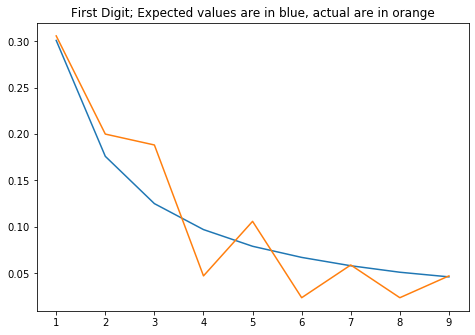

In [12]:
first_digit_percentile = [(x / sum(first_Digit)) for x in first_Digit]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
index = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
x = np.arange(len(index))
plt.xticks(x, index)
ax.plot(x, First_digit_benfords, label= 'Actual')
ax.plot(x, first_digit_percentile, label= 'Expected')
plt.title('First Digit; Expected values are in blue, actual are in orange')
plt.show()

### Second Digit Test

In [0]:
second_Digit_percentile = [(x / sum(second_Digit)) for x in second_Digit]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
x = np.arange(len(index))
plt.xticks(x, index)
ax.plot(x, Benford_percentiles['Second Digit Expected'])
ax.plot(x, second_Digit_percentile)
plt.title('Second Digit; Expected values are in blue, actual are in orange')
plt.show()

Could not connect to 127.0.0.1: 51407
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2019.2.4\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 449, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2019.2.4\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_utils.py", line 68, in attach_to_debugger
    debugger.connect(pydev_localhost.get_localhost(), debugger_port)
  File "C:\Program Files\JetBrains\PyCharm 2019.2.4\plugins\python\helpers\pydev\pydevd.py", line 607, in connect
    s = start_client(host, port)
  File "C:\Program Files\JetBrains\PyCharm 2019.2.4\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 449, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] No connection could be made because 

### Third Digit Test

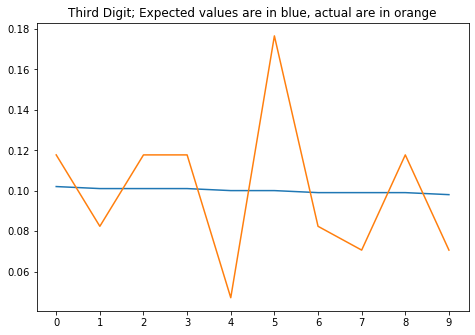

In [14]:
third_Digit_percentile = [(x / sum(third_Digit)) for x in third_Digit]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
x = np.arange(len(index))
plt.xticks(x, index)
ax.plot(x, Benford_percentiles['Third Digit Expected'])
ax.plot(x, third_Digit_percentile)
plt.title('Third Digit; Expected values are in blue, actual are in orange')
plt.show()

## First Conclusions:
* **First Digit Test**
    * The first digit test didnt tell us a lot of information. The data seems to conform to benford's law with some deviation possible with the digit 3. We will examine this data again later to see if three is significantly different than its expected value.
  
* **Second Digit Test**
    * The Second digit test was more telling with nearly *no* zeroes, fours and nines. At least according to the graph. Three, five and eight also are suspiciously distributed.
    
* **Third Digit Test**
    * The third digit test seems to reveal numbers close to their expected values, with most digits staying with 2% except for four and five. Since we aren't testing directly for deficiencies of numbers, we will probably examine just number 5.


**Now we are creating a DataFrame which just makes our data easier to manipulate**

In [15]:
#reinitialize these variables before I alter them just to keep the code clean
first_digit_percentile = [(x / sum(first_Digit)) for x in first_Digit]
first_digit_percentile.insert(0, 0)
index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

final_series = {'First Digit Test': first_digit_percentile,
                'Second Digit Test': second_Digit_percentile,
                'Third Digit Test': third_Digit_percentile}
digit_df = pd.DataFrame(data=final_series, index=index)
final_df = pd.merge(digit_df, Benford_percentiles, on=digit_df.index, how='outer')

**Lets we combine the data to view it all together and manipulate it**

In [16]:
final_df

,key_0,First Digit Test,Second Digit Test,Third Digit Test,First Digit Expected,Second Digit Expected,Third Digit Expected
0,0,0.000000,0.070588,0.117647,0.000,0.120,0.102
1,1,0.305882,0.082353,0.082353,0.301,0.114,0.101
2,2,0.200000,0.094118,0.117647,0.176,0.109,0.101
3,3,0.188235,0.129412,0.117647,0.125,0.104,0.101
4,4,0.047059,0.070588,0.047059,0.097,0.100,0.100
5,5,0.105882,0.152941,0.176471,0.079,0.097,0.100
6,6,0.023529,0.105882,0.082353,0.067,0.093,0.099
7,7,0.058824,0.082353,0.070588,0.058,0.090,0.099
8,8,0.023529,0.141176,0.117647,0.051,0.088,0.099
9,9,0.047059,0.070588,0.070588,0.046,0.085,0.098


**Let us view the box plot for our data**

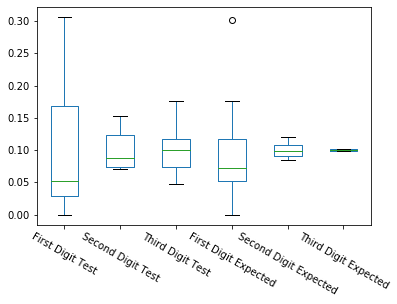

In [17]:
final_df.plot(kind='box', rot=-30)

Normally one would expect strong similarities between a digit test and its expected result in terms of its box plot statistics... although our small sample size may have hindered our results

In [43]:
print('Skew\n', final_df.skew(), '\nKurtosis:\n', final_df.kurt())

Skew
 key_0                    0.000000
First Digit Test         1.147558
Second Digit Test        0.728589
Third Digit Test         0.716166
First Digit Expected     1.609226
Second Digit Expected    0.445641
Third Digit Expected     0.000000
dtype: float64 
Kurtosis:
 key_0                   -1.200000
First Digit Test         0.424606
Second Digit Test       -1.050789
Third Digit Test         0.860344
First Digit Expected     3.032587
Second Digit Expected   -0.905766
Third Digit Expected    -0.911808
dtype: float64


**Especially insteresting is the cell below which shows the actual standard deviations and the expected standard deviations which differ vastly on the second and third digit test**

In [19]:
final_df.std()

First Digit Test         0.099557
Second Digit Test        0.031003
Third Digit Test         0.036892
First Digit Expected     0.085259
Second Digit Expected    0.011643
Third Digit Expected     0.001247
dtype: float64

**Now we need to find out where we are finding these abnormal digit counts.**

-In order to do that we will separate each digit test into its own data sheet and then find their differences

-Once we have found the differences, we will establish a threshold for error. In our case I chose 5%. 

-So if a number is more than 5% away from the expected value based on Benford's law, then this program should select it.

In [20]:
def myDataFrame(sample, digit_test, expected):
    difference = []
    for x in range(len(digit_test)):
        difference.append(digit_test[x]-expected[x])
    if len(sample) < 10:
        sample.insert(0, 0)
    output = pd.DataFrame({
        'Sample Count': sample, 
        'Digit Test (%)': digit_test, 
        'Expected Values (%)': expected, 
        'Difference (%)': difference
                        })
    return output

In [21]:
#This runs the function we created before on each of my different tests
first_digit_df = myDataFrame(first_Digit, final_df['First Digit Test'], final_df['First Digit Expected'])
second_digit_df = myDataFrame(second_Digit, final_df['Second Digit Test'], final_df['Second Digit Expected'])
third_digit_df = myDataFrame(third_Digit, final_df['Third Digit Test'], final_df['Third Digit Expected'])

#now I convert the numbers into percentage values to make my data tables more readable
for x in [first_digit_df, second_digit_df, third_digit_df]:
    for y in ['Digit Test (%)', 'Expected Values (%)', 'Difference (%)']:
        x[y] = round(x[y].apply(lambda i: i*100), 2)

#Below is an example of the completed data table
first_digit_df

,Sample Count,Digit Test (%),Expected Values (%),Difference (%)
0,0,0.00,0.0,0.00
1,26,30.59,30.1,0.49
2,17,20.00,17.6,2.40
3,16,18.82,12.5,6.32
4,4,4.71,9.7,-4.99
5,9,10.59,7.9,2.69
6,2,2.35,6.7,-4.35
7,5,5.88,5.8,0.08
8,2,2.35,5.1,-2.75
9,4,4.71,4.6,0.11


## Before Moving On
Before doing our final analysis, locating of the accounts and our conclusion, we will explore the last-two test. This test checks for rounding of numbers by examining the last two digits in our entire data-sets, and looking for highly used numbers and abnormally grouped numbers.

# Last-Two Test

**Before we finish analyzing our earlier data, lets examine the last two digits to determine whether or not rounding was used**

First lets define our expectations for the last two digits. 

* Not including items in the cents place we should expect to see an even distribution across all numbers between 00-99
* Something that may corrupt our dataset is that we dont even have 100 different numbers (around 95 unique numbers)
* However, if we see a significant repetition or grouping of some numbers over others then there may be a case of rounding to be made

### Now lets define a function to count the iterations of the last two digits of every number

In [22]:
def last_two_digit_test(input_list):
    """accepts a data frame as an input and returns a list of the count of each digit out of 100 digits"""
    #create an list of 100 integers, each with a zero value
    myList = []
    for _ in range(100):
        myList.append(0)
    for num in input_list:
        num = str(num)
        output = str(num)[-2:]
        myList[(int(output))-1] += 1
    return myList

In [23]:
last_two = last_two_digit_test(finalData)

### Plot the Data

* The function is now defined and we have run our dataset through the function

* 'last_two' contains the frequency of every number between 01-100. 

Next lets plot the data in order to visualize if there is any oddly repetitive values

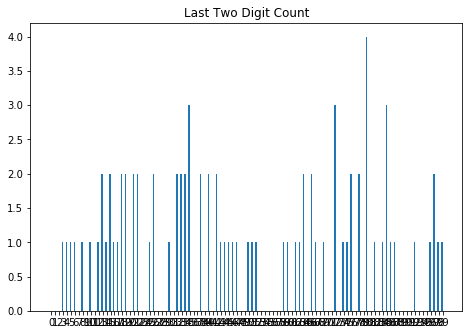

In [24]:
index = []
for x in range(100):
    index.append(x)

#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width = .35
x = np.arange(len(index))
plt.xticks(x, index)
ax.bar(x - width/2, last_two, width= width)
plt.title('Last Two Digit Count')
plt.show()

#### Results
As this graph shows, there are a few values with more than two occurrences.

There might be something interesting with whatever value shows up four times, but *due to the small sample size, it is difficult finding strong evidence for rounding in the last two digits* 

That being said, lets figure out which number appears four times just to see if there is significance to it.

In [25]:
last_two_df = pd.DataFrame(last_two, index=index)
print([ j for (i,j) in zip(last_two, index) if i >= 4 ])

[80]


## Conclusion:


So the two number that appears four times is 80.

Due to our small sample size, we should disregard the significance of this number at this point, but if it reappears in our final analysis we should re-examine.

Now back to the heart of our analysis.

# Locating the Suspicious Data

In this section we go through the original csv file and examine which numbers follow suspicious patterns.

Our next section of code finds statistically significant differences between our tested count values and expected values. We them store those in a dictionary called 'significant_numbers.'

The output of our function is below the code.

In [26]:
#We create new variables called 'significant numbers' which we will alter in order to deliver us just the significant digits

first_digit_significant_numbers = first_digit_df.copy()
second_digit_significant_numbers = second_digit_df.copy()
third_digit_significant_numbers = third_digit_df.copy()

#This for loop adds the significant digit to a list called 'temp' when the difference of the number is greater than 5%
temp = []
for x in [first_digit_significant_numbers, second_digit_significant_numbers, third_digit_significant_numbers]:
    temp.append(x.index.where(x['Difference (%)'] > 5).dropna())

#Now we convert the list into a cleaner version which will be easier to work with and put it in a dictionary
significant_numbers = {
    'First Digit Significant Values' : temp[0].astype(int).values,
    'Second Digit Significant Values' : temp[1].astype(int).values,
    'Third Digit Significant Values' : temp[2].astype(int).values
}
#here is an example of what those numbers are
significant_numbers

{'First Digit Significant Values': array([3], dtype=int64),
 'Second Digit Significant Values': array([5, 8], dtype=int64),
 'Third Digit Significant Values': array([5], dtype=int64)}

**Now we have our answer.**

The digit *3* in the first test

The digits *5* and *8* in our second test

And the digits *4* and *5* in our third digit test.

***Next Steps***

Now we will see where these numbers appear in our original CSV.

In [27]:
#This cell changes all of my integers into strings which are easier to slice in order to locate the sections of the 990 that
#might contain fraudulent data
finalData = [str(x) for x in finalData]

In [28]:
#these lines below actually are finding the numbers in our entire dataset where the digit at some given position
#matches the number and the position that we are looking for
first_numbers = [x for x in finalData if x[:1] in significant_numbers['First Digit Significant Values'].astype(str)]
second_numbers = [x for x in finalData if x[1:2] in significant_numbers['Second Digit Significant Values'].astype(str)]
third_numbers = [x for x in finalData if x[2:3] in significant_numbers['Third Digit Significant Values'].astype(str)]

This gives us three lists of numbers which contain one or more of the suspicious digits as shown below

In [29]:
print(first_numbers, second_numbers, third_numbers)

['3834833', '36926019', '396641', '335673', '336687', '3690707', '350531', '38904404', '3833581', '37801365', '3045439', '3626520', '355273', '372252', '3433336', '31935018'] ['3834833', '78400', '259816', '58833', '587914', '5514388', '455081', '1552635', '1586477', '556715', '754573', '183486', '350531', '258036', '38904404', '3833581', '18595451', '988439', '25027', '355273', '456298', '5866347', '2836227', '2817', '151743'] ['735579', '23543', '205983', '455081', '335673', '6650616', '265798', '1552635', '1450405', '18595451', '265181', '275934', '355273', '235485', '195275']


**Next we find which values reappear in multiple tests**

Meaning... which values have *multiple* suspicious digits in them.

First we are going to define a function called 'intersection' which will take two arguments, two lists, and then return another list which contains all the values that are found in both lists

In [30]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [31]:
inter_one_two = intersection(first_numbers, second_numbers)
inter_one_three = intersection(first_numbers, third_numbers)
inter_two_three = intersection(second_numbers, third_numbers)
interfinal = intersection(inter_one_two, third_numbers)
print(inter_one_two)
print(inter_one_three)
print(inter_two_three)
print(interfinal)

['3834833', '350531', '38904404', '3833581', '355273']
['335673', '355273']
['455081', '1552635', '18595451', '355273']
['355273']


**The two numbers that 'interfinal' produces are the two numbers that fit in our suspicious lists for all of the first, second and third digits. These are prime suspects.**

It turns out in our case that there is only one digit, '355273'


**Below we find our 'result' which is a combination of every number which appeared in multiple lists**

What this means is that every value in the 'result' list is a suspicious value selected for its lack of correlation with their expected result according to Benford's law.

In [32]:
in_first = set(inter_one_two)
in_second = set(inter_two_three)

in_second_but_not_in_first = in_second - in_first

result = inter_one_two + list(in_second_but_not_in_first)

**For clarity lets print our list at this point to make sure the numbers make sense**

In [33]:
print(result)

['3834833', '350531', '38904404', '3833581', '355273', '1552635', '18595451', '455081']


There are quite a few suspicious numbers in our list. 8 out of a sample size of 85. 

On to the last step: Our final account location analysis

# Final Analysis:

### Analyze Suspicious Account Names
We are on the last steps...

We just need to find the suspicious values and there corresponding account names, from that point we can come to our final conclusion.

Read the comments in the code below to see how we filter the list down to just our targeted values.


In [34]:
#delete all values that arent on our list 'result'
all_to_investigate = df[df.isin(result)]

#remove every column that is entirely 'NaN' values
all_to_investigate = all_to_investigate.dropna(axis='columns', how='all')

#remove every row that is entirely 'NaN' values
all_to_investigate = all_to_investigate.dropna(axis='index', how='all')

### Now we have a data frame (shown below) of every suspicious account name and its associated value

-Next we should go through this list and rule out values that are dependent on other values

-For example, 'Total expenses' is unlikely to be a suspicious account by itself, as it is merely a sum of other values. However, accounts like Contributions, gifts and grants or other fees could entirely contain fraudulent numbers.

In [35]:
all_to_investigate

,A,B
"Contibutions, gifts, grans",3834833.0,NaN
Pension plan accruals and contributions (also 401k),455081.0,NaN
other fees,1552635.0,NaN
Info. Tech.,NaN,355273.0
Other: Student activities,350531.0,NaN
Total expenses,38904404.0,NaN
revenue less expenses,3833581.0,NaN
Net assets or fund balances at end of year,18595451.0,NaN


### Finally

The last thing we should do is drop every account that is dependent on other values to bring us to our final list of the auditing targets.

In [36]:
to_drop = ['revenue less expenses', 'Total expenses']
final_list = all_to_investigate.drop(to_drop)
final_list

,A,B
"Contibutions, gifts, grans",3834833.0,NaN
Pension plan accruals and contributions (also 401k),455081.0,NaN
other fees,1552635.0,NaN
Info. Tech.,NaN,355273.0
Other: Student activities,350531.0,NaN
Net assets or fund balances at end of year,18595451.0,NaN


# Conclusion

Now we have a list of every suspicious account. The next course of action is to recommend an audit for all of these accounts. They are all likely targets of fraud due to the fact that they all likely represent a large number of transactions. 

However, it is likely that no fraud exists as our sample size is so low. With only 85 samples we cannot be too sure, but it is still very interesting that things like the first digit test worked so well but the second and third digit tests saw massive deviations from their expected values.

In [37]:
final_list

,A,B
"Contibutions, gifts, grans",3834833.0,NaN
Pension plan accruals and contributions (also 401k),455081.0,NaN
other fees,1552635.0,NaN
Info. Tech.,NaN,355273.0
Other: Student activities,350531.0,NaN
Net assets or fund balances at end of year,18595451.0,NaN


# Sources
* Association of Certified Fraud Examiners; "Using Benford's Law to Detect Fraud." https://www.acfe.com/uploadedFiles/Shared_Content/Products/Self-Study_CPE/UsingBenfordsLaw_2018_final_extract.pdf

* Theodore P. Hill, "The Significant-Digit Phenomenon", The American Mathematical Monthly, Vol. 102, No. 4, (Apr., 1995), pp. 322–327. https://digitalcommons.calpoly.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1041&context=rgp_rsr

* Formann, A. K. (2010). Morris, Richard James (ed.). "The Newcomb–Benford Law in Its Relation to Some Common Distributions". PLoS ONE. 5 (5): e10541. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0010541

* Nigrini, M. J. (2012) Benford's Law. Hoboken, NJ: John Wiley & Sons.

* Goodman, William (2016) "The promises and pitfalls of Benford's law" The Royal Statistical Society. https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00919.x

* Ward's Wonderful Computational Finance Slides